# Imports!

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Data Cleaning and Set Up

In [98]:
years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994]

for year in years:
    ucsd_enr = pd.read_excel(f'/Users/tvidyala/Desktop/uc uh oh!/Enrollment/ucsd {year} enr.xlsx')
    ucsd_enr.columns = ucsd_enr.columns.str.strip()
    ucsd_enr = ucsd_enr.rename(columns={
        'School': 'school', 'City': 'city', 'County/State/ Territory': 'county',
        'Count': 'status', 'All': 'total'
    }).query("status != 'Enr'").drop(['Calculation1', 'Female', 'Male', 'Other', 'Unknown'], axis=1)
    ucsd_enr['school'] = ucsd_enr['school'].fillna(method='ffill')
    ucsd_enr['city'] = ucsd_enr['city'].fillna(method='ffill')
    ucsd_enr['county'] = ucsd_enr['county'].fillna(method='ffill')
    ucsd_enr['total'] = ucsd_enr['total'].fillna(0)
    ucsd_enr = ucsd_enr.pivot_table(index=['school', 'city', 'county'], columns='status', values='total', fill_value=0).reset_index()
    ucsd_enr['acceptance_rate'] = (ucsd_enr['Adm'] / ucsd_enr['App'] * 100).round(2)
    ucsd_gpa = pd.read_excel(f'/Users/tvidyala/Desktop/uc uh oh!/GPA/ucsd {year} gpa.xlsx')
    ucsd_gpa.columns = ucsd_gpa.columns.str.strip()
    ucsd_gpa = ucsd_gpa.drop(['Calculation1', 'Enrl GPA'], axis=1).rename(columns={
        'School': 'school', 'City': 'city', 'County/State/Country': 'county',
        'App GPA': 'app_gpa', 'Adm GPA': 'adm_gpa'
    }).round({'app_gpa': 2, 'adm_gpa': 2})
    ucsd = pd.merge(ucsd_enr, ucsd_gpa, on=['school', 'city', 'county'], how='left')
    ucsd = ucsd.rename(columns={'Adm': 'adm', 'App': 'app'})
    ucsd.to_csv(f'/Users/tvidyala/Desktop/uc uh oh!/uc clean data/ucsd {year}.csv', index=False)

In [83]:
years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    globals()[f'ucsd_{year}'] = pd.read_csv(f'ucsd {year}.csv')

In [84]:
ucsd_2023

,school,city,county,adm,app,acceptance_rate,app_gpa,adm_gpa
0,A B MILLER HIGH SCHOOL,Fontana,San Bernardino,0,17,0.00,3.78,3.89
1,ABLE CHARTER,Stockton,San Joaquin,0,0,NaN,NaN,NaN
2,ABRAHAM LINCOLN HIGH SCHOOL,Los Angeles,Los Angeles,13,34,38.24,3.80,4.16
3,ABRAHAM LINCOLN HIGH SCHOOL,San Francisco,San Francisco,29,136,21.32,3.80,4.29
4,ABRAHAM LINCOLN HIGH SCHOOL,San Jose,Santa Clara,6,35,17.14,3.86,4.28
...,...,...,...,...,...,...,...,...
1407,YREKA HIGH SCHOOL,Yreka,Siskiyou,0,7,0.00,4.03,NaN
1408,YUBA CITY CHARTER SCHOOL,Yuba City,Sutter,0,0,NaN,NaN,NaN
1409,YUBA CITY HIGH SCHOOL,Yuba City,Sutter,3,7,42.86,3.48,NaN
1410,YUCAIPA SENIOR HIGH SCHOOL,Yucaipa,San Bernardino,13,53,24.53,3.92,4.25


# View by City

(0.0, 79.90865949119373)

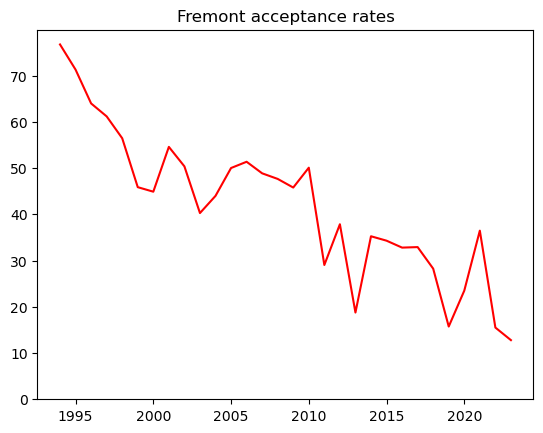

In [85]:
my_city = "Fremont"
years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
acceptance_rates = []
avg_gpa = []
gpa_diff = []
num_applying = []

for year in years:
    data = globals()[f'ucsd_{year}']
    city_data = data.loc[data.city == my_city]
    num_applying.append(city_data['app'].sum())
    acceptance_rates.append((city_data['adm'].sum()/city_data['app'].sum())*100)
    avg_gpa.append(city_data['adm_gpa'].mean())
    gpa_diff.append(city_data['app_gpa'].mean() - city_data['adm_gpa'].mean())
    
plt.title(f'{my_city} acceptance rates')
plt.plot(years, acceptance_rates, color = 'r')
plt.ylim(bottom=0) 

# View by County

(0.0, 72.33407832086289)

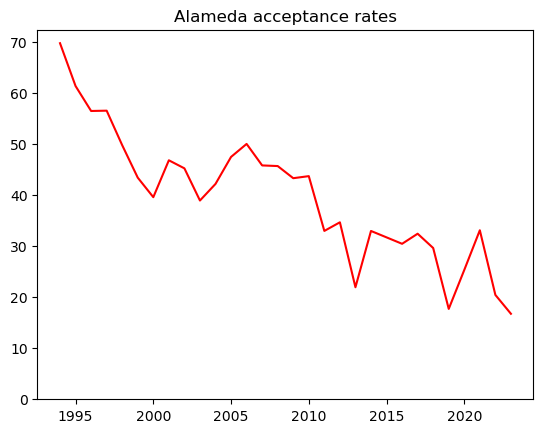

In [86]:
my_county = "Alameda"
years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
acceptance_rates = []
avg_gpa = []
gpa_diff = []
num_applying = []

for year in years:
    data = globals()[f'ucsd_{year}']
    county_data = data.loc[data.county == my_county]
    num_applying.append(county_data['app'].sum())
    acceptance_rates.append((county_data['adm'].sum()/county_data['app'].sum())*100)
    avg_gpa.append(county_data['adm_gpa'].mean())
    gpa_diff.append(county_data['app_gpa'].mean() - county_data['adm_gpa'].mean())
    
plt.title(f'{my_county} acceptance rates')
plt.plot(years, acceptance_rates, color = 'r')
plt.ylim(bottom=0) 

# View By Entire California

(0.0, 67.3319273387017)

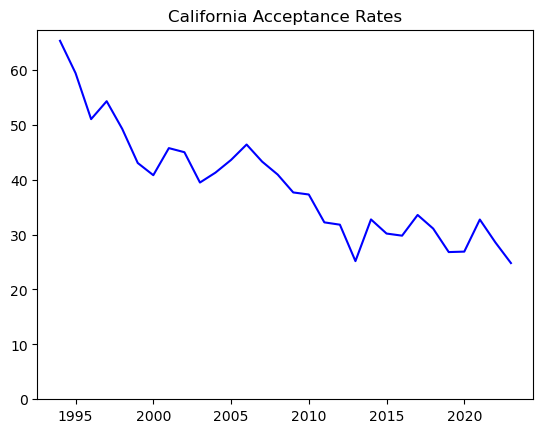

In [87]:
years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
acceptance_rates = []
avg_gpa = []
gpa_diff = []
num_applying = []

for year in years:
    data = globals()[f'ucsd_{year}']
    acceptance_rates.append((data.adm.sum()/data.app.sum())*100)
    avg_gpa.append(data.adm_gpa.mean())
    gpa_diff.append(data.adm_gpa.mean()-data.app_gpa.mean())
    num_applying.append(data.app.sum())
    
plt.title(f'California Acceptance Rates')
plt.plot(years, acceptance_rates, color = 'b') # change based on which you want to view
plt.ylim(bottom=0) 

# Predict Future Data

### Put all of it into one ginormous file!

In [88]:
ucsd = pd.DataFrame()

In [89]:
ucsd.to_csv('ucsd.csv')

In [90]:
years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
for yr in years:
    data = globals()[f'ucsd_{yr}']
    data['year'] = str(yr)

In [91]:
ucsd = pd.concat([ucsd_1994, ucsd_1995, ucsd_1996, ucsd_1997, ucsd_1998, ucsd_1999, ucsd_2000, ucsd_2001, ucsd_2002, ucsd_2003, ucsd_2004, ucsd_2005, ucsd_2006, ucsd_2007, ucsd_2008, ucsd_2009, ucsd_2010, ucsd_2011, ucsd_2012, ucsd_2013, ucsd_2014, ucsd_2015, ucsd_2016, ucsd_2017, ucsd_2018, ucsd_2019, ucsd_2020, ucsd_2021, ucsd_2022, ucsd_2023], axis = 0, ignore_index = True)

In [92]:
ucsd = ucsd.fillna(0)

In [93]:
ucsd

,school,city,county,adm,app,acceptance_rate,app_gpa,adm_gpa,year
0,A B MILLER HIGH SCHOOL,Fontana,San Bernardino,6.0,7.0,85.71,3.73,0.00,1994
1,ABRAHAM LINCOLN HIGH SCHOOL,Los Angeles,Los Angeles,7.0,14.0,50.00,3.27,3.71,1994
2,ABRAHAM LINCOLN HIGH SCHOOL,San Francisco,San Francisco,9.0,18.0,50.00,3.46,3.97,1994
3,ABRAHAM LINCOLN HIGH SCHOOL,San Jose,Santa Clara,8.0,13.0,61.54,3.89,3.96,1994
4,ACALANES HIGH SCHOOL,Lafayette,Contra Costa,44.0,61.0,72.13,3.62,3.90,1994
...,...,...,...,...,...,...,...,...,...
33336,YUBA CITY CHARTER SCHOOL,Yuba City,Sutter,0.0,0.0,0.00,0.00,0.00,2023
33337,YUBA CITY HIGH SCHOOL,Yuba City,Sutter,4.0,28.0,14.29,3.90,0.00,2023
33338,YUBA CITY INDEPENDENCE ACADEMY,Yuba City,Sutter,0.0,0.0,0.00,0.00,0.00,2023
33339,YUCAIPA SENIOR HIGH SCHOOL,Yucaipa,San Bernardino,11.0,63.0,17.46,3.92,4.27,2023


## Random Forest Regressor to Predict Acceptance Rates

In [94]:
uc_predictor = RandomForestRegressor(random_state = 41)

features = ['year', 'adm_gpa', 'app_gpa']

X = ucsd[features]
y = ucsd.acceptance_rate

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
uc_predictor.fit(train_X, train_y)
predictions = uc_predictor.predict(val_X)
print(mean_absolute_error(val_y, predictions))

10.399292375009523


Not bad, It's about a 89.6% accuracy rate

In [95]:
results = pd.DataFrame({
    'Actual': val_y,
    'Predicted': predictions
})

In [96]:
results

,Actual,Predicted
21183,30.86,20.044867
22169,0.00,3.129353
23873,30.48,24.393057
13432,0.00,1.294094
31298,34.88,30.332100
...,...,...
28550,31.25,25.600400
10388,35.29,32.208100
30720,0.00,29.505580
14753,0.00,0.711163


## Predict a Specific Value

In [97]:
uc_predictor = RandomForestRegressor(random_state = 42) 
features = ['year', 'adm_gpa', 'app_gpa']

X = ucsd[features]
y = ucsd.acceptance_rate
input_data = np.array([[2023, 4.1, 3.7]])

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
uc_predictor.fit(train_X, train_y)
predictions = uc_predictor.predict(input_data)
print(f'The predicted acceptance rate is {predictions[0]:.2f}')

The predicted acceptance rate is 45.82


/Users/tvidyala/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Adding Location Data to the Model

Coming soon!

## Visualizing Future Acceptance and GPA Trends

Coming soon!